In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pickle
import numpy as np
import librosa
import librosa.display
import IPython.display
import sklearn
from keras.models import Sequential
from keras.layers import Dense, CuDNNLSTM, Dropout, Flatten, GaussianDropout, BatchNormalization
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import to_categorical
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
def show_history(history):
    print(history.history.keys())
    fig = plt.figure(figsize=(20,5))
    plt.subplot(121)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower left')
    plt.show()

In [3]:
n_frame = 173
n_mfcc = 40

In [4]:
train_x = pickle.load(open('./train_x.dat', 'rb'))
train_y = pickle.load(open('./train_y.dat', 'rb'))
test_x = pickle.load(open('./test_x.dat', 'rb'))
test_y = pickle.load(open('./test_y.dat', 'rb'))

train_x = train_x.transpose((0,2,1))
test_x = test_x.transpose((0,2,1))

# train_x = np.mean(train_x,axis = 2)
# test_x = np.mean(test_x,axis = 2)

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [5]:
train_x.shape

(2686, 173, 40)

In [7]:
model = Sequential()
# model.add(Flatten(input_shape = train_x.shape[1:]))
model.add(CuDNNLSTM(units=64, input_shape = (n_frame, n_mfcc), return_sequences=True))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
# model.add(BatchNormalization())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
# model.add(BatchNormalization())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_1 (CuDNNLSTM)     (None, 173, 64)           27136     
_________________________________________________________________
flatten_3 (Flatten)          (None, 11072)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              11338752  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
__________

Train on 2148 samples, validate on 538 samples
Epoch 1/20
2148/2148 [==============================] - 10s 5ms/step - loss: 2.3363 - acc: 0.1774 - val_loss: 2.2490 - val_acc: 0.1487
Epoch 2/20
2148/2148 [==============================] - 4s 2ms/step - loss: 1.6807 - acc: 0.4088 - val_loss: 1.9070 - val_acc: 0.2881
Epoch 3/20
2148/2148 [==============================] - 4s 2ms/step - loss: 1.1198 - acc: 0.6229 - val_loss: 1.9645 - val_acc: 0.2732
Epoch 4/20
2148/2148 [==============================] - 4s 2ms/step - loss: 0.6489 - acc: 0.7756 - val_loss: 2.4183 - val_acc: 0.2677
Epoch 5/20
2148/2148 [==============================] - 4s 2ms/step - loss: 0.4411 - acc: 0.8594 - val_loss: 2.6922 - val_acc: 0.2770
Epoch 6/20
2148/2148 [==============================] - 5s 2ms/step - loss: 0.2862 - acc: 0.9036 - val_loss: 2.8728 - val_acc: 0.3067
Epoch 7/20
2148/2148 [==============================] - 4s 2ms/step - loss: 0.2573 - acc: 0.9176 - val_loss: 2.6604 - val_acc: 0.3197
Epoch 8/20
214

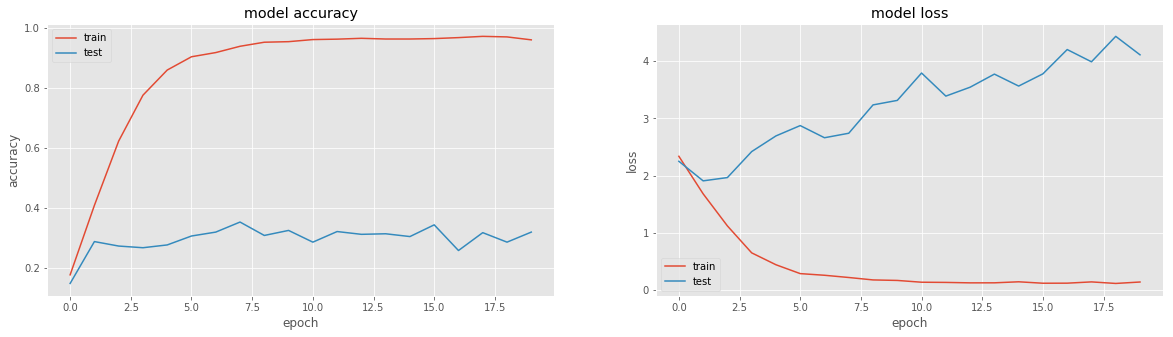

In [8]:
history = model.fit(train_x, train_y,
                    epochs=20, batch_size=32,
                    validation_split=0.2)
show_history(history)

In [9]:
model.evaluate(test_x, test_y)

837/837 [==============================] - 0s 557us/step


[3.427379308920465, 0.3870967742291545]